# Importing Libraries and loading dataset

In [ ]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer  
from keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
from keras.utils import plot_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "mohammedelhamamsy"
os.environ['KAGGLE_KEY'] = "9aaa548524fd7bf0e369fb28b8a4ba06"

In [ ]:
!kaggle competitions download -c jigsaw-unintended-bias-in-toxicity-classification

  0% 0.00/224k [00:00<?, ?B/s]
100% 224k/224k [00:00<00:00, 69.4MB/s]
 74% 9.00M/12.1M [00:00<00:00, 88.0MB/s]
100% 12.1M/12.1M [00:00<00:00, 98.3MB/s]
100% 64.7M/64.7M [00:00<00:00, 74.2MB/s]

 32% 5.00M/15.9M [00:00<00:00, 47.8MB/s]
100% 15.9M/15.9M [00:00<00:00, 77.7MB/s]
 95% 309M/326M [00:02<00:00, 137MB/s]
100% 326M/326M [00:03<00:00, 106MB/s]
 44% 7.00M/15.8M [00:00<00:00, 71.4MB/s]
100% 15.8M/15.8M [00:00<00:00, 101MB/s] 
 96% 265M/276M [00:02<00:00, 105MB/s]
100% 276M/276M [00:02<00:00, 119MB/s]
 73% 9.00M/12.3M [00:00<00:00, 40.7MB/s]
100% 12.3M/12.3M [00:00<00:00, 48.4MB/s]


In [ ]:
!ls

all_data.csv.zip
identity_individual_annotations.csv.zip
sample_data
sample_submission.csv.zip
test.csv.zip
test_private_expanded.csv.zip
test_public_expanded.csv.zip
toxicity_individual_annotations.csv.zip
train.csv.zip


In [ ]:
!unzip "/content/train.csv.zip"

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [ ]:
train_data = pd.read_csv("/content/train.csv")

In [ ]:
train_data

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:42.870083+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:45.222647+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:47.601894+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:48.488476+00,2,NaN,2006,rejected,0,0,0,1,0,0.0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-11 00:55:39.265997+00,54,6332382.0,399385,approved,0,0,0,0,0,0.0,0,4
1804870,6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-11 00:55:56.634498+00,54,6333871.0,399528,approved,0,0,0,0,0,0.0,0,4
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-11 00:59:02.840713+00,54,NaN,399457,approved,0,0,0,0,0,0.0,0,4
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-11 01:01:10.153692+00,13,6333833.0,399519,approved,0,0,0,0,0,0.0,0,66


In [ ]:
import gc
train_data = train_data[["id","target","comment_text"]]
gc.collect()
train_data

,id,target,comment_text
0,59848,0.000000,"This is so cool. It's like, 'would you want yo..."
1,59849,0.000000,Thank you!! This would make my life a lot less...
2,59852,0.000000,This is such an urgent design problem; kudos t...
3,59855,0.000000,Is this something I'll be able to install on m...
4,59856,0.893617,haha you guys are a bunch of losers.
...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w..."
1804870,6333969,0.000000,What do you call people who STILL think the di...
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ..."
1804872,6334009,0.621212,Anyone who is quoted as having the following e...


(array([1266229.,  160959.,  170695.,    5515.,   57142.,   72099.,
          26784.,   14620.,   21605.,    9226.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

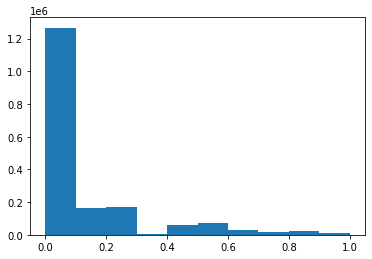

In [ ]:
import matplotlib.pyplot as plt
plt.hist(train_data.target)

In [ ]:
train_data.target.describe()

count    1.804874e+06
mean     1.030173e-01
std      1.970757e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.666667e-01
max      1.000000e+00
Name: target, dtype: float64

In [ ]:
# A function that buckets the target variable into 0->2 severity levels
import math
def toxicity_severity(toxicity):
  return math.floor(toxicity*(3-1e-10))
toxicity_severity(1)

2

In [ ]:
train_data["severity"] = train_data.target.apply(toxicity_severity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_data

,id,target,comment_text,severity
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0
1,59849,0.000000,Thank you!! This would make my life a lot less...,0
2,59852,0.000000,This is such an urgent design problem; kudos t...,0
3,59855,0.000000,Is this something I'll be able to install on m...,0
4,59856,0.893617,haha you guys are a bunch of losers.,2
...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0
1804870,6333969,0.000000,What do you call people who STILL think the di...,0
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,1


In [ ]:
# We take a stratified sample of the data 
N =50000 # Sample size
train_data = train_data.groupby('severity', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(train_data))))).sample(frac=1).reset_index(drop=True)
train_data.severity.value_counts()

0    44314
1     3937
2     1749
Name: severity, dtype: int64

In [ ]:
train_data.drop('severity',axis=1,inplace=True) 
train_data

,id,target,comment_text
0,5598499,0.000000,Mainstream is in the eye of the beholder. You...
1,4979890,0.000000,"Actually, the world empires in chronological o..."
2,5928092,0.166667,Why do ANTHC bigwigs need to be paid the overi...
3,5079507,0.000000,The happiest are those who need cash from thei...
4,607868,0.400000,What a mess in the Ukraine! Putin is a thug an...
...,...,...,...
49995,924985,0.200000,Nice piece of revisionist history you present ...
49996,5371452,0.000000,I can't imagine the Trump administration going...
49997,4993338,0.000000,"Hey there, Dougy Downer. Pitts is a brilliant ..."
49998,5108490,0.000000,"I agree, the odds of that outcome are fairly h..."



# Preprocessing Pipeline



In [ ]:
def remove_mentions(text):
  return ' '.join(filter(lambda x:x[0]!='@', text.split()))

def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_mentions(text)
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [ ]:
# Train Comments and Test comments
trn_corpus=train_data.comment_text.apply(normalize_text).tolist()

In [ ]:
trn_corpus[:10]

['mainstream eye beholder seem dictate isnt mainstream order make point ignore fact breitbart mainstream breitbart reader besideswhat fairness medium fact junior catch another lie meet russian order get dirt hrc medium fairness exclusive junior action',
 'actually world empire chronological order egyptian mesopotamian indus valley chinese greek roman parthian etc europe percent world population asia percent word combine asian empire time larger european empire',
 'anthc bigwig need pay overinflated market rate healthcare executive strategic vision high demand take talent healthcare corporation alaska pay million year fairly compensate precisely nonprofit healthcare expensive administrative salary bloat suck resource patient care exchange little way improve patient outcome meanwhile clinical staff tell salary cut remain stagnant order contain cost year ago healthcare executive decide adopt wall street compensation model grossly overinflating salary corrupt deal compensation committee ju

# Tokenaization

In [ ]:
from keras.preprocessing.text import Tokenizer

vocab_sz = 10000 
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_corpus)

In [ ]:
y_train=train_data.target
# del train_data
gc.collect()

# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_corpus, mode='binary')

# Train Test Split

In [ ]:
gc.collect()
from sklearn.model_selection import train_test_split

x_train = np.asarray(x_train).astype('float32')
y_train = pd.get_dummies(y_train).values
y_train = np.asarray(y_train).astype('float32')

# partial_x_train, x_val, partial_y_train, y_val = train_test_split(
#     x_train, y_train, test_size=0.2, random_state=0, stratify = y_train)


partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=0)

# BOW (Binary Features)

In [ ]:
partial_x_train[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
from keras import models
from keras import layers
from keras.layers import Dropout
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(
    16
    , activation='relu'
    , input_shape=(10000,)
    ,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),))
model.add(Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import losses
from keras import metrics
from keras import optimizers


model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss=losses.MeanSquaredError(name="mean_squared_error"),
              metrics=[metrics.MeanSquaredError(name="mean_squared_error")])

In [ ]:
history = model.fit(partial_x_train,
                   partial_y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_val,y_val))

Epoch 1/10
625/625 [==============================] - 4s 5ms/step - loss: 0.2111 - mean_squared_error: 0.2000 - val_loss: 0.0572 - val_mean_squared_error: 0.0542
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0431 - mean_squared_error: 0.0400 - val_loss: 0.0097 - val_mean_squared_error: 0.0070
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0086 - mean_squared_error: 0.0063 - val_loss: 0.0031 - val_mean_squared_error: 0.0018
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0031 - mean_squared_error: 0.0021 - val_loss: 0.0017 - val_mean_squared_error: 0.0012
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0014 - val_loss: 0.0013 - val_mean_squared_error: 0.0012
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0012 - val_loss: 0.0013 - val_mean_squared_error: 0.0012
Epoch 7/10
625/625 [========

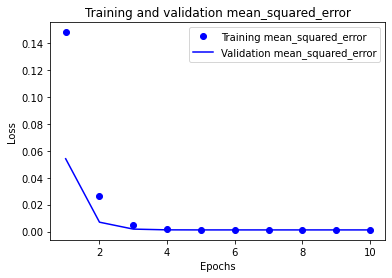

In [ ]:
import matplotlib.pyplot as plt
plt.clf()   # clear figure
mse_values = history.history['mean_squared_error']
val_mse_values = history.history['val_mean_squared_error']

epochs = range(1, len(mse_values) + 1)

plt.plot(epochs, mse_values, 'bo', label='Training mean_squared_error')
plt.plot(epochs, val_mse_values, 'b', label='Validation mean_squared_error')
plt.title('Training and validation mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# LSTM (Glove pretrained embeddings) 

In [ ]:
tok.word_index.items()

dict_items([('UNK', 1), ('people', 2), ('get', 3), ('would', 4), ('one', 5), ('like', 6), ('go', 7), ('make', 8), ('trump', 9), ('say', 10), ('dont', 11), ('think', 12), ('year', 13), ('u', 14), ('know', 15), ('time', 16), ('need', 17), ('right', 18), ('take', 19), ('see', 20), ('state', 21), ('want', 22), ('tax', 23), ('even', 24), ('many', 25), ('good', 26), ('work', 27), ('pay', 28), ('use', 29), ('way', 30), ('government', 31), ('well', 32), ('much', 33), ('come', 34), ('thing', 35), ('give', 36), ('could', 37), ('country', 38), ('vote', 39), ('money', 40), ('also', 41), ('look', 42), ('canada', 43), ('never', 44), ('im', 45), ('back', 46), ('really', 47), ('try', 48), ('comment', 49), ('law', 50), ('thats', 51), ('fact', 52), ('point', 53), ('let', 54), ('still', 55), ('mean', 56), ('call', 57), ('change', 58), ('leave', 59), ('day', 60), ('job', 61), ('problem', 62), ('find', 63), ('keep', 64), ('live', 65), ('new', 66), ('life', 67), ('world', 68), ('cant', 69), ('support', 70),

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-05-08 18:53:41--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-05-08 18:53:41--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-05-08 18:53:41--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
max_length = 100
vocab_sz = 10000 

# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt', mode='rt', encoding='utf-8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_sz, 100))
for word, i in tok.word_index.items():
  if i == vocab_sz:
    break
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


In [ ]:
x_train_seq = tok.texts_to_sequences(trn_corpus)

# Train Test Split

In [ ]:
gc.collect()

x_train_seq = pad_sequences(x_train_seq, maxlen=max_length)

partial_x_train, x_val, partial_y_train, y_val = train_test_split(
    x_train_seq, y_train, test_size=0.2, random_state=0)

In [ ]:
x_train_seq[0:1]

[[1684,
  731,
  1,
  69,
  2136,
  141,
  1684,
  314,
  8,
  54,
  453,
  52,
  3043,
  1684,
  3043,
  1561,
  1,
  2563,
  178,
  52,
  2310,
  660,
  87,
  170,
  277,
  358,
  314,
  2,
  3345,
  3076,
  178,
  2563,
  3434,
  2310,
  264]]

In [ ]:
from keras.layers import LSTM, GRU

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers import Embedding

n_latent_factors = 100
model = models.Sequential()
model.add(layers.Embedding(vocab_sz, n_latent_factors, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1616      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss=losses.MeanSquaredError(name="mean_squared_error"),
              metrics=[metrics.MeanSquaredError(name="mean_squared_error")])
history = model.fit(partial_x_train,
                   partial_y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_val,y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/10
625/625 [==============================] - 41s 17ms/step - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2/10
625/625 [==============================] - 10s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 3/10
625/625 [==============================] - 10s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 4/10
625/625 [==============================] - 10s 17ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 5/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 6/10
625/625 [==============================] - 10s 16ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 7/10
625/6

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

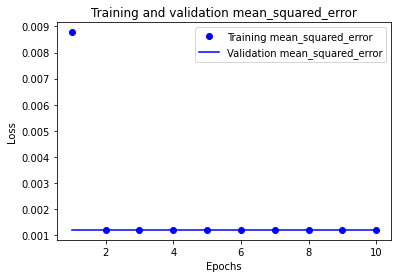

In [ ]:
import matplotlib.pyplot as plt
plt.clf()   # clear figure
mse_values = history.history['mean_squared_error']
val_mse_values = history.history['val_mean_squared_error']

epochs = range(1, len(mse_values) + 1)

plt.plot(epochs, mse_values, 'bo', label='Training mean_squared_error')
plt.plot(epochs, val_mse_values, 'b', label='Validation mean_squared_error')
plt.title('Training and validation mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# GRU 

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(vocab_sz, n_latent_factors, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(GRU(100, return_sequences=True))
model.add(GRU(100))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
gru (GRU)                    (None, 100, 100)          60600     
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               60600     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 16)                1616      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
              loss=losses.MeanSquaredError(name="mean_squared_error"),
              metrics=[metrics.MeanSquaredError(name="mean_squared_error")])
history = model.fit(partial_x_train,
                   partial_y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_val,y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/10
625/625 [==============================] - 12s 15ms/step - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 2/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 3/10
625/625 [==============================] - 8s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 4/10
625/625 [==============================] - 9s 14ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 5/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 6/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 7/10
625/625 [=

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

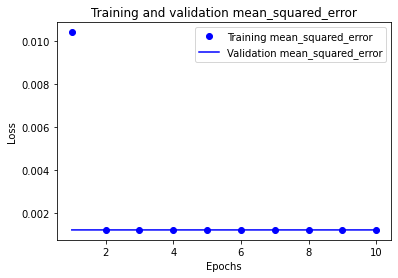

In [ ]:
import matplotlib.pyplot as plt
plt.clf()   # clear figure
mse_values = history.history['mean_squared_error']
val_mse_values = history.history['val_mean_squared_error']

epochs = range(1, len(mse_values) + 1)

plt.plot(epochs, mse_values, 'bo', label='Training mean_squared_error')
plt.plot(epochs, val_mse_values, 'b', label='Validation mean_squared_error')
plt.title('Training and validation mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()